We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [40]:
# Render our plots inline
%matplotlib inline

In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

Pandas should already be installed on your machine, but if you get an error in the import statement above, indicating that pandas is not available, please uncomment the following command and execute:

In [42]:
# !sudo python3 -m pip install -U pandas

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [43]:
# Make the graphs a bit bigger
plt.rcParams['figure.figsize'] = (15, 5)

### Basic Example: Creating a DataFrame from Scratch

This is an example of creating a dataframe by passing a list of dictionaries.

In [44]:
df = pd.DataFrame([ 
    {"First Name": "Panos", "Last Name":" Ipeirotis"},
    {"First Name": "John", "Last Name":" Doe"},
    {"Last Name":"Trump"}
])


In [45]:
df

,First Name,Last Name
0,Panos,Ipeirotis
1,John,Doe
2,NaN,Trump


### Reading Data Files

Let's take a look at the restaurant inspections file (at `data/restaurants.csv`), which we used in our earlier classes.

If you do not have it, then uncomment and execute the following:

In [46]:
# !curl 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD' -o data/restaurant.csv

In [47]:
# !rm data/restaurant.csv.gz
# !gzip data/restaurant.csv

In [48]:
!gzip -cd data/restaurant.csv.gz | head -3

CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
41047105,LIBRETTO'S PIZZERIA,MANHATTAN,546,3 AVENUE,10016,2122136445,American,07/31/2015,Violations were cited in the following area(s).,04N,"Filth flies or food/refuse/sewage-associated (FRSA) flies present in facilitys food and/or non-food areas. Filth flies include house flies, little house flies, blow flies, bottle flies and flesh flies. Food/refuse/sewage-associated flies include fruit flies, drain flies and Phorid flies.",Critical,24,,,05/06/2017,Cycle Inspection / Initial Inspection
40388386,LEE'S VILLA CHINESE RESTAURANT,BROOKLYN,152,LAWRENCE STREET,11201,7188551818,Chinese,10/28/2015,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drai

### Reading a CSV file

We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [49]:
import pandas as pd
restaurants = pd.read_csv("data/restaurant.csv.gz", encoding="utf-8", dtype="unicode")

When you read a CSV, you get back a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary. Let's take a look at how the object looks like:

In [50]:
restaurants.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41047105,LIBRETTO'S PIZZERIA,MANHATTAN,546,3 AVENUE,10016,2122136445,American,07/31/2015,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,24,NaN,NaN,05/06/2017,Cycle Inspection / Initial Inspection
1,40388386,LEE'S VILLA CHINESE RESTAURANT,BROOKLYN,152,LAWRENCE STREET,11201,7188551818,Chinese,10/28/2015,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,8,A,10/28/2015,05/06/2017,Cycle Inspection / Re-inspection
2,40392685,DOJO RESTAURANT,MANHATTAN,10,WEST 4 STREET,10012,2125058934,Japanese,05/19/2015,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,05/06/2017,Administrative Miscellaneous / Initial Inspection
3,40756287,BARBARESCO,MANHATTAN,843,LEXINGTON AVENUE,10065,2125172288,Italian,02/12/2015,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,17,NaN,NaN,05/06/2017,Cycle Inspection / Initial Inspection
4,41452373,PEACHES MARKET TABLE,BROOKLYN,415,TOMPKINS AVENUE,11216,7184839111,Soul Food,04/25/2016,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,7,A,04/25/2016,05/06/2017,Cycle Inspection / Initial Inspection


The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

### Descriptive statistics

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [51]:
restaurants.describe()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,418541,418281,418541,418446,418539,418539,418536,418541,418541,417616,411458,411157,418541,393333,204053,202466,418541,417616
unique,26318,20818,6,7249,3313,232,25046,84,1404,5,94,92,3,119,7,1316,1,34
top,50001880,DUNKIN' DONUTS,MANHATTAN,0,BROADWAY,10003,7186566210,American,01/01/1900,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Critical,12,A,08/24/2016,05/06/2017,Cycle Inspection / Initial Inspection
freq,95,4473,167187,2559,15603,11702,241,96398,925,399001,58597,58597,229271,40350,160078,474,418541,237552


We can also check the data types for each column

In [52]:
restaurants.dtypes

CAMIS                    object
DBA                      object
BORO                     object
BUILDING                 object
STREET                   object
ZIPCODE                  object
PHONE                    object
CUISINE DESCRIPTION      object
INSPECTION DATE          object
ACTION                   object
VIOLATION CODE           object
VIOLATION DESCRIPTION    object
CRITICAL FLAG            object
SCORE                    object
GRADE                    object
GRADE DATE               object
RECORD DATE              object
INSPECTION TYPE          object
dtype: object

The `object` type is a string. For many of these, we would like to change the data types for a few columns, using the `pd.to_numeric` and `pd.to_datetime` functions:

In [53]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants.dtypes

CAMIS                     object
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                   object
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
dtype: object

In [54]:
restaurants[["SCORE"]].describe()

,SCORE
count,393333.000000
mean,18.744679
std,12.600985
min,-2.000000
25%,11.000000
50%,15.000000
75%,24.000000
max,138.000000


Now let's convert the dates columns into the appropriate data types:

In [55]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

In [56]:
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

In [57]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe()

,INSPECTION DATE,GRADE DATE,RECORD DATE
count,418541,202466,418541
unique,1404,1316,1
top,1900-01-01 00:00:00,2016-08-24 00:00:00,2017-05-06 00:00:00
freq,925,474,418541
first,1900-01-01 00:00:00,2012-05-01 00:00:00,2017-05-06 00:00:00
last,2017-05-04 00:00:00,2017-05-04 00:00:00,2017-05-06 00:00:00


In [58]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

In [59]:
restaurants.describe(include='all')

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,418541,418281,418541,418446,418539,418539,418536,418541,418541,417616,411458,411157,418541,393333.000000,198713,202466,418541,417616
unique,26318,20818,6,7249,3313,232,25046,84,1404,5,94,92,3,NaN,3,1316,1,34
top,50001880,DUNKIN' DONUTS,MANHATTAN,0,BROADWAY,10003,7186566210,American,1900-01-01 00:00:00,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Critical,NaN,A,2016-08-24 00:00:00,2017-05-06 00:00:00,Cycle Inspection / Initial Inspection
freq,95,4473,167187,2559,15603,11702,241,96398,925,399001,58597,58597,229271,NaN,160078,474,418541,237552
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2012-05-01 00:00:00,2017-05-06 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-04 00:00:00,2017-05-06 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.744679,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.600985,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN


### Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [60]:
restaurants["VIOLATION CODE"].head(5)

0    04N
1    10B
2    20F
3    04L
4    10B
Name: VIOLATION CODE, dtype: category
Categories (94, object): [02A, 02B, 02C, 02D, ..., 22C, 22E, 22F, 22G]

In [61]:
column_list = ["GRADE DATE","VIOLATION CODE", "DBA"]
restaurants[ column_list ].head(5)

,GRADE DATE,VIOLATION CODE,DBA
0,NaT,04N,LIBRETTO'S PIZZERIA
1,2015-10-28,10B,LEE'S VILLA CHINESE RESTAURANT
2,NaT,20F,DOJO RESTAURANT
3,NaT,04L,BARBARESCO
4,2016-04-25,10B,PEACHES MARKET TABLE


We can also get quick statistics about the common values that appear in each column:

In [62]:
restaurants["DBA"].value_counts()

DUNKIN' DONUTS                           4473
SUBWAY                                   4136
MCDONALD'S                               2882
STARBUCKS                                2260
DUNKIN' DONUTS, BASKIN ROBBINS           1512
DOMINO'S                                 1463
CROWN FRIED CHICKEN                      1283
BURGER KING                              1140
KENNEDY FRIED CHICKEN                    1133
POPEYES LOUISIANA KITCHEN                1025
CHIPOTLE MEXICAN GRILL                    996
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     936
PAPA JOHN'S                               720
WENDY'S                                   546
KFC                                       484
CARVEL ICE CREAM                          454
AU BON PAIN                               438
LITTLE CAESARS                            423
CHECKERS                                  408
LE PAIN QUOTIDIEN                         394
PRET A MANGER                             385
HALE & HEARTY SOUP                

In [63]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:20]

American                                                            96398
Chinese                                                             44233
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    20035
Pizza                                                               19742
Italian                                                             19306
Mexican                                                             15840
CafÃ©/Coffee/Tea                                                    15749
Japanese                                                            15005
Caribbean                                                           13287
Bakery                                                              12329
Spanish                                                             12063
Pizza/Italian                                                        9202
Delicatessen                                                         6515
Asian                                 

In [64]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();
violation_counts[0:10]

10F    58597
08A    41026
02G    29967
04L    29241
06D    26945
06C    26111
10B    22889
02B    20458
04N    19329
04H     9559
Name: VIOLATION CODE, dtype: int64

In [65]:
violation_counts = restaurants["VIOLATION DESCRIPTION"].value_counts();
violation_counts[0:10]

Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                      58597
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.                                                                                                                                                                   41026
Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.                                                                                                                                                                   29967
Evidence of mice or live mice present in facility's food and/or non-food areas.                        

And we can use the "plot" command to plot the resulting histogram. (More details at http://pandas.pydata.org/pandas-docs/stable/visualization.html) We also revisit plotting below.

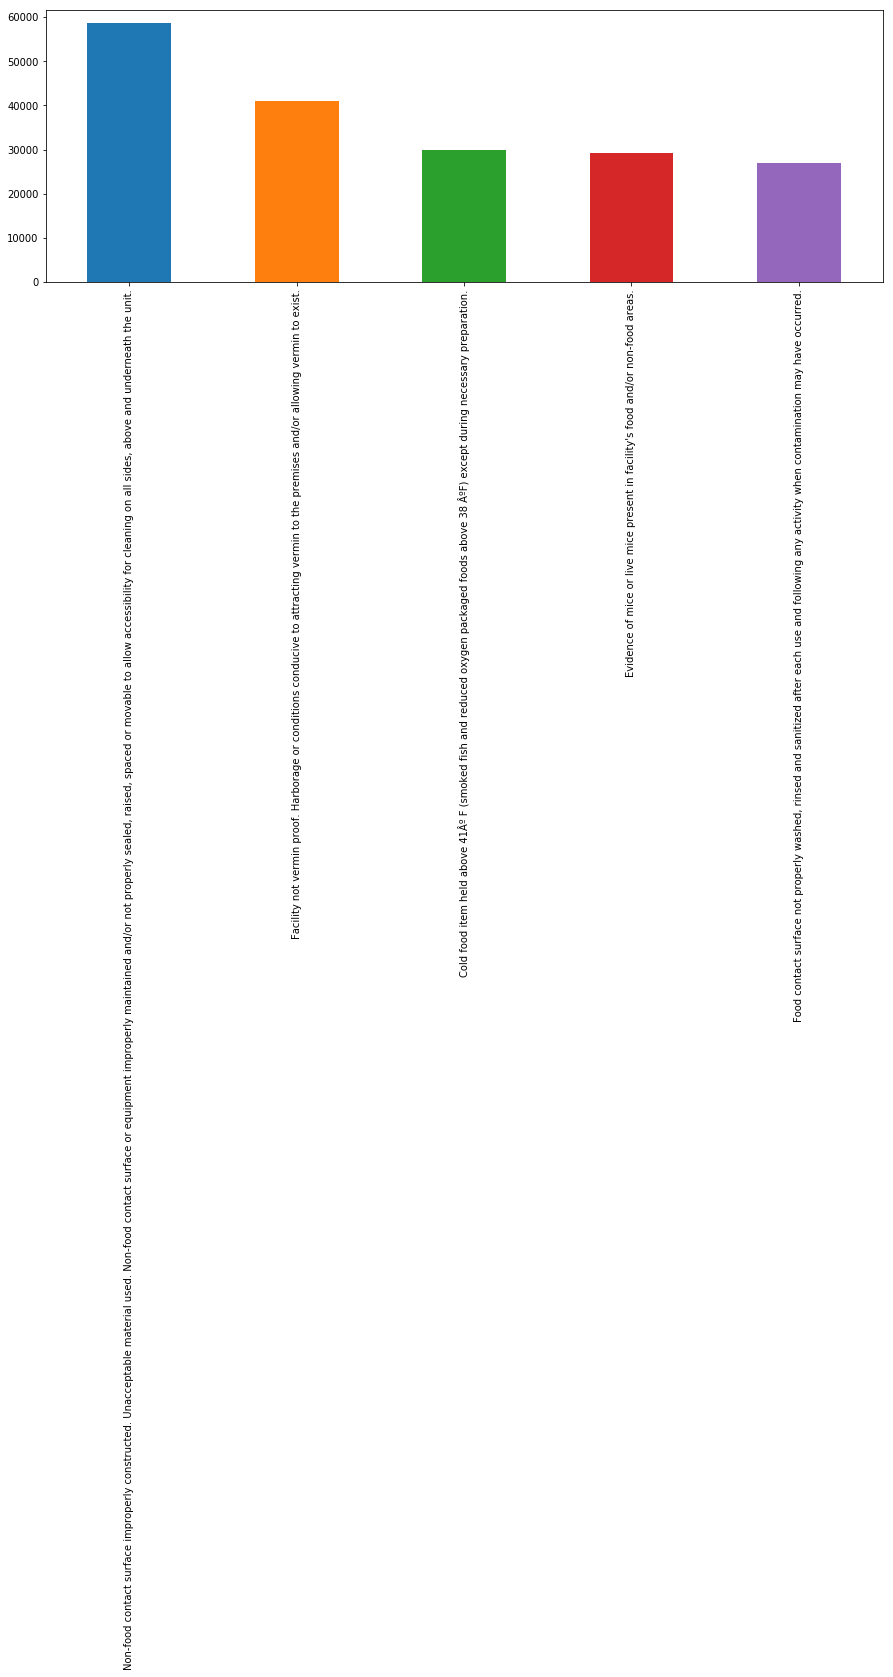

In [66]:
violation_counts[:5].plot(kind='bar')

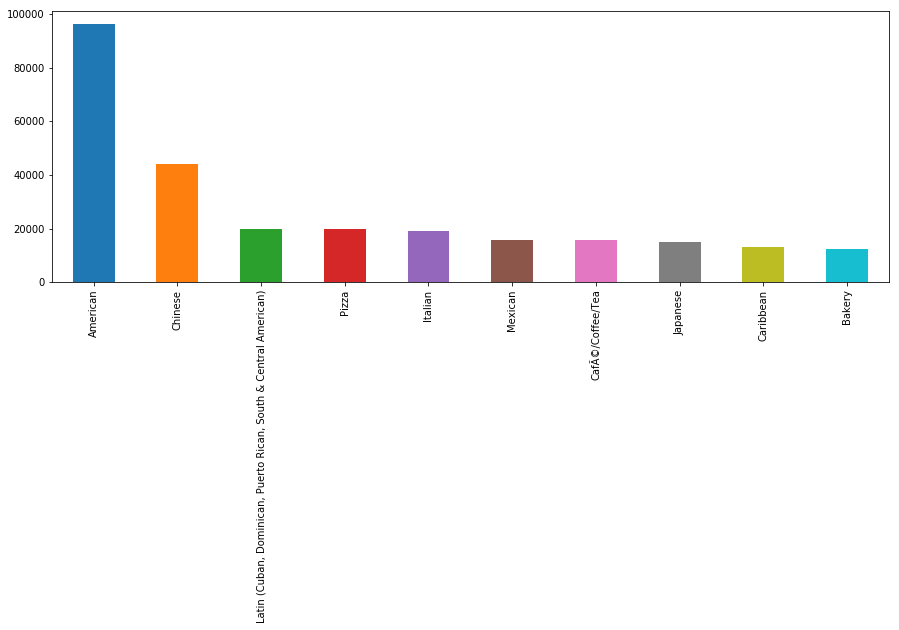

In [67]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:10].plot(kind='bar')

### Using the map command

The map command in Python has the following syntax:

`map(function, [list of values for first argument], [list of values for second argument]...)`

It takes as input a function, which has a set of parameters. Then, it iterates over the lists that follow; the lists contain the arguments that are passed to the function. Map returns a list of values that are the result of applying the function to all the elements of the list(s). 

For example, in the following code, the `add` function is going to be applied to the two lists (`[1, 2, 3, 4]` and `[9, 10, 10, 11]`) that follow. The result of the map will be a list containing the values `[add(1,2), add(2,10), add(3,10), add(4,11)]`




In [68]:
def capitalize(x):
    return x[0].upper() + x[1:].lower()

capitalize("panos")

'Panos'

In [69]:
example = map(capitalize, ["panos", "christopher", "caterina", "lucy"])
list(example)

['Panos', 'Christopher', 'Caterina', 'Lucy']

In [70]:
def add(x,y):
    return x+y
    
example = map(add, [1, 2, 3, 4], [9, 10, 10, 11])
list(example)

[10, 12, 13, 15]

#### Using the map for dataframes

Using the map command, we can:
* Create new columns for the dataframe
* Modify existing columns
* Generate new columns that are the result of operations on the columns of the dataframe

For example, suppose that we want to format the phone column. We can write a function that takes as input a phone and formats it as we want. Then we apply the function using the map command as follows:

In [71]:
restaurants['PHONE']

0         2122136445
1         7188551818
2         2125058934
3         2125172288
4         7184839111
5         2125322653
6         3476146034
7         9174001727
8         2123166776
9         9178682793
10        9176897320
11        7184659812
12        7186330600
13        2125298250
14        2129961739
15        5164457910
16        2129280800
17        7184370078
18        7182040141
19        7182240690
20        2127878316
21        7187795880
22        7189480714
23        2128777934
24        7182303666
25        2125059100
26        2129240818
27        8608407947
28        3476833383
29        7188710526
             ...    
418511    2122190212
418512    7183025100
418513    7186252235
418514    2122555416
418515    7186760149
418516    2123984646
418517    7187406546
418518    2122282222
418519    7185331113
418520    7185763579
418521    2128891330
418522    2126090500
418523    7184604911
418524    3474421160
418525    3478502388
418526    6465770726
418527    212

In [72]:
import re
def formatPhone(phoneString):
    if phoneString == None:
        return ""
    regex = re.compile(r'([2-9]\d{2})\W*(\d{3})\W*(\d{4})')
    match = regex.search(str(phoneString))
    if match:
        area_code = match.group(1)
        first_three = match.group(2)
        last_four = match.group(3)
        formatted = "(" + area_code + ") " + first_three + "-" + last_four
        return formatted
    else:
        return ""

In [73]:
formatPhone("2129980803")

'(212) 998-0803'

In [74]:
restaurants['FormattedPhone'] = restaurants['PHONE'].apply(formatPhone)

In [75]:
list(map(formatPhone, restaurants['PHONE']))

['(212) 213-6445',
 '(718) 855-1818',
 '(212) 505-8934',
 '(212) 517-2288',
 '(718) 483-9111',
 '(212) 532-2653',
 '(347) 614-6034',
 '(917) 400-1727',
 '(212) 316-6776',
 '(917) 868-2793',
 '(917) 689-7320',
 '(718) 465-9812',
 '(718) 633-0600',
 '(212) 529-8250',
 '(212) 996-1739',
 '(516) 445-7910',
 '(212) 928-0800',
 '(718) 437-0078',
 '(718) 204-0141',
 '(718) 224-0690',
 '(212) 787-8316',
 '(718) 779-5880',
 '(718) 948-0714',
 '(212) 877-7934',
 '(718) 230-3666',
 '(212) 505-9100',
 '(212) 924-0818',
 '(860) 840-7947',
 '(347) 683-3383',
 '(718) 871-0526',
 '(718) 539-6666',
 '(718) 735-7707',
 '(718) 722-7200',
 '(718) 359-5454',
 '(917) 754-8318',
 '(718) 401-8314',
 '(718) 791-5035',
 '(917) 743-6830',
 '(212) 695-5815',
 '(917) 353-4050',
 '(718) 347-8052',
 '(718) 793-7300',
 '(212) 485-2400',
 '(212) 689-0058',
 '(718) 224-1133',
 '(212) 535-3100',
 '(813) 282-1225',
 '(718) 544-4040',
 '(718) 522-3455',
 '(718) 231-6560',
 '(718) 358-0888',
 '(347) 931-7784',
 '(718) 886-

In [76]:
restaurants[['PHONE', 'FormattedPhone']]

,PHONE,FormattedPhone
0,2122136445,(212) 213-6445
1,7188551818,(718) 855-1818
2,2125058934,(212) 505-8934
3,2125172288,(212) 517-2288
4,7184839111,(718) 483-9111
5,2125322653,(212) 532-2653
6,3476146034,(347) 614-6034
7,9174001727,(917) 400-1727
8,2123166776,(212) 316-6776
9,9178682793,(917) 868-2793


In [97]:
def printAddress(boro, building, street, zipcode, phone):
    if boro == None:
        boro = ""
    if building == None:
        building = ""
    if street == None:
        street = ""
    if zipcode == None:
        zipcode = ""
    if phone == None:
        phone = ""
    
    result = str(building) + " " + str(street) + ", " + \
    str(boro) + ", " + str(zipcode) +  ", Phone: " + str(formatPhone(phone))
    return result

printAddress("Manhattan", "44", "West 4th", "10012", 2129980803
             
             
            )


'44 West 4th, Manhattan, 10012, Phone: (212) 998-0803'

In [98]:

restaurants["FormattedAddress"] = list(map(printAddress, 
                                     restaurants["BORO"],
                                     restaurants["BUILDING"],
                                     restaurants["STREET"],
                                     restaurants["ZIPCODE"],
                                     restaurants["PHONE"]))

In [99]:
restaurants.head(10)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,FormattedPhone,FormattedAddress
0,41047105,LIBRETTO'S PIZZERIA,MANHATTAN,546,3 AVENUE,10016,2122136445,American,2015-07-31,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,24.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(212) 213-6445,"546 3 AVENUE, MANHATTAN, 10016, Phone: (212) 2..."
1,40388386,LEE'S VILLA CHINESE RESTAURANT,BROOKLYN,152,LAWRENCE STREET,11201,7188551818,Chinese,2015-10-28,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,8.0,A,2015-10-28,2017-05-06,Cycle Inspection / Re-inspection,(718) 855-1818,"152 LAWRENCE STREET, BROOKLYN, 11201, Phone: (..."
2,40392685,DOJO RESTAURANT,MANHATTAN,10,WEST 4 STREET,10012,2125058934,Japanese,2015-05-19,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaT,2017-05-06,Administrative Miscellaneous / Initial Inspection,(212) 505-8934,"10 WEST 4 STREET, MANHATTAN, 10012, Phone: (21..."
3,40756287,BARBARESCO,MANHATTAN,843,LEXINGTON AVENUE,10065,2125172288,Italian,2015-02-12,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,17.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(212) 517-2288,"843 LEXINGTON AVENUE, MANHATTAN, 10065, Phone:..."
4,41452373,PEACHES MARKET TABLE,BROOKLYN,415,TOMPKINS AVENUE,11216,7184839111,Soul Food,2016-04-25,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,7.0,A,2016-04-25,2017-05-06,Cycle Inspection / Initial Inspection,(718) 483-9111,"415 TOMPKINS AVENUE, BROOKLYN, 11216, Phone: (..."
5,50019277,LENWICH,MANHATTAN,459,PARK AVE S,10016,2125322653,American,2016-04-21,Violations were cited in the following area(s).,06B,"Tobacco use, eating, or drinking from open con...",Critical,33.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(212) 532-2653,"459 PARK AVE S, MANHATTAN, 10016, Phone: (212)..."
6,50036053,ASADERO LA FOGATA,QUEENS,10840,CORONA AVE,11368,3476146034,"Latin (Cuban, Dominican, Puerto Rican, South &...",2016-09-20,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,7.0,A,2016-09-20,2017-05-06,Cycle Inspection / Initial Inspection,(347) 614-6034,"10840 CORONA AVE, QUEENS, 11368, Phone: (347) ..."
7,50014007,JUPIOCA,MANHATTAN,113,CHURCH ST,10007,9174001727,"Juice, Smoothies, Fruit Salads",2015-12-01,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,10.0,A,2015-12-01,2017-05-06,Cycle Inspection / Initial Inspection,(917) 400-1727,"113 CHURCH ST, MANHATTAN, 10007, Phone: (917) ..."
8,40534837,AJANTA INDIA,MANHATTAN,1237,AMSTERDAM AVENUE,10027,2123166776,Indian,2016-06-14,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,31.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(212) 316-6776,"1237 AMSTERDAM AVENUE, MANHATTAN, 10027, Phone..."
9,50044024,KOR TOR MOR,BROOKLYN,204,SMITH ST,11201,9178682793,Thai,2016-08-09,Establishment Closed by DOHMH. Violations wer...,10F,Non-food contact surface improperly constructe...,Not Critical,55.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(917) 868-2793,"204 SMITH ST, BROOKLYN, 11201, Phone: (917) 86..."


In [100]:
restaurants[["FormattedAddress", "STREET", "BUILDING", "BORO"]]


,FormattedAddress,STREET,BUILDING,BORO
0,"546 3 AVENUE, MANHATTAN, 10016, Phone: (212) 2...",3 AVENUE,546,MANHATTAN
1,"152 LAWRENCE STREET, BROOKLYN, 11201, Phone: (...",LAWRENCE STREET,152,BROOKLYN
2,"10 WEST 4 STREET, MANHATTAN, 10012, Phone: (21...",WEST 4 STREET,10,MANHATTAN
3,"843 LEXINGTON AVENUE, MANHATTAN, 10065, Phone:...",LEXINGTON AVENUE,843,MANHATTAN
4,"415 TOMPKINS AVENUE, BROOKLYN, 11216, Phone: (...",TOMPKINS AVENUE,415,BROOKLYN
5,"459 PARK AVE S, MANHATTAN, 10016, Phone: (212)...",PARK AVE S,459,MANHATTAN
6,"10840 CORONA AVE, QUEENS, 11368, Phone: (347) ...",CORONA AVE,10840,QUEENS
7,"113 CHURCH ST, MANHATTAN, 10007, Phone: (917) ...",CHURCH ST,113,MANHATTAN
8,"1237 AMSTERDAM AVENUE, MANHATTAN, 10027, Phone...",AMSTERDAM AVENUE,1237,MANHATTAN
9,"204 SMITH ST, BROOKLYN, 11201, Phone: (917) 86...",SMITH ST,204,BROOKLYN


### Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [101]:
# Selecting columns from a data frame: create a list of column
# names and pass it within brackets [ ]
restaurants[  ["GRADE DATE","VIOLATION CODE", "DBA"] ].head(5)

,GRADE DATE,VIOLATION CODE,DBA
0,NaT,04N,LIBRETTO'S PIZZERIA
1,2015-10-28,10B,LEE'S VILLA CHINESE RESTAURANT
2,NaT,20F,DOJO RESTAURANT
3,NaT,04L,BARBARESCO
4,2016-04-25,10B,PEACHES MARKET TABLE


In [102]:
restaurants

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,FormattedPhone,FormattedAddress
0,41047105,LIBRETTO'S PIZZERIA,MANHATTAN,546,3 AVENUE,10016,2122136445,American,2015-07-31,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,24.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(212) 213-6445,"546 3 AVENUE, MANHATTAN, 10016, Phone: (212) 2..."
1,40388386,LEE'S VILLA CHINESE RESTAURANT,BROOKLYN,152,LAWRENCE STREET,11201,7188551818,Chinese,2015-10-28,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,8.0,A,2015-10-28,2017-05-06,Cycle Inspection / Re-inspection,(718) 855-1818,"152 LAWRENCE STREET, BROOKLYN, 11201, Phone: (..."
2,40392685,DOJO RESTAURANT,MANHATTAN,10,WEST 4 STREET,10012,2125058934,Japanese,2015-05-19,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaT,2017-05-06,Administrative Miscellaneous / Initial Inspection,(212) 505-8934,"10 WEST 4 STREET, MANHATTAN, 10012, Phone: (21..."
3,40756287,BARBARESCO,MANHATTAN,843,LEXINGTON AVENUE,10065,2125172288,Italian,2015-02-12,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,17.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(212) 517-2288,"843 LEXINGTON AVENUE, MANHATTAN, 10065, Phone:..."
4,41452373,PEACHES MARKET TABLE,BROOKLYN,415,TOMPKINS AVENUE,11216,7184839111,Soul Food,2016-04-25,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,7.0,A,2016-04-25,2017-05-06,Cycle Inspection / Initial Inspection,(718) 483-9111,"415 TOMPKINS AVENUE, BROOKLYN, 11216, Phone: (..."
5,50019277,LENWICH,MANHATTAN,459,PARK AVE S,10016,2125322653,American,2016-04-21,Violations were cited in the following area(s).,06B,"Tobacco use, eating, or drinking from open con...",Critical,33.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(212) 532-2653,"459 PARK AVE S, MANHATTAN, 10016, Phone: (212)..."
6,50036053,ASADERO LA FOGATA,QUEENS,10840,CORONA AVE,11368,3476146034,"Latin (Cuban, Dominican, Puerto Rican, South &...",2016-09-20,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,7.0,A,2016-09-20,2017-05-06,Cycle Inspection / Initial Inspection,(347) 614-6034,"10840 CORONA AVE, QUEENS, 11368, Phone: (347) ..."
7,50014007,JUPIOCA,MANHATTAN,113,CHURCH ST,10007,9174001727,"Juice, Smoothies, Fruit Salads",2015-12-01,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,10.0,A,2015-12-01,2017-05-06,Cycle Inspection / Initial Inspection,(917) 400-1727,"113 CHURCH ST, MANHATTAN, 10007, Phone: (917) ..."
8,40534837,AJANTA INDIA,MANHATTAN,1237,AMSTERDAM AVENUE,10027,2123166776,Indian,2016-06-14,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,31.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(212) 316-6776,"1237 AMSTERDAM AVENUE, MANHATTAN, 10027, Phone..."
9,50044024,KOR TOR MOR,BROOKLYN,204,SMITH ST,11201,9178682793,Thai,2016-08-09,Establishment Closed by DOHMH. Violations wer...,10F,Non-food contact surface improperly constructe...,Not Critical,55.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(917) 868-2793,"204 SMITH ST, BROOKLYN, 11201, Phone: (917) 86..."


In [103]:
# Create the condition "has mice" for code 04L
mice = (restaurants["VIOLATION CODE"] == "04L")
mice

0         False
1         False
2         False
3          True
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13         True
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
418511    False
418512    False
418513    False
418514    False
418515    False
418516    False
418517    False
418518    False
418519    False
418520    False
418521    False
418522    False
418523    False
418524    False
418525    False
418526    False
418527    False
418528    False
418529    False
418530    False
418531    False
418532     True
418533    False
418534    False
418535    False
418536    False
418537    False
418538    False
418539    False
418540    False
Name: VIOLATION CODE, Le

In [104]:

# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called  has_mice
has_mice = restaurants[mice]
has_mice

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,FormattedPhone,FormattedAddress
3,40756287,BARBARESCO,MANHATTAN,843,LEXINGTON AVENUE,10065,2125172288,Italian,2015-02-12,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,17.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(212) 517-2288,"843 LEXINGTON AVENUE, MANHATTAN, 10065, Phone:..."
13,41671728,ZERZA,MANHATTAN,320,EAST 6 STREET,10003,2125298250,Moroccan,2015-09-01,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,20.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(212) 529-8250,"320 EAST 6 STREET, MANHATTAN, 10003, Phone:..."
31,40363920,NEW GOLDEN BILLION,BROOKLYN,976,RUTLAND ROAD,11212,7187357707,Chinese,2014-04-23,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,13.0,A,2014-04-23,2017-05-06,Cycle Inspection / Initial Inspection,(718) 735-7707,"976 RUTLAND ROAD, BROOKLYN, 11212, Phone: (718..."
40,50013286,THE PIKE,QUEENS,27102,UNION TPKE,11040,7183478052,American,2016-07-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,19.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(718) 347-8052,"27102 UNION TPKE, QUEENS, 11040, Phone: (718) ..."
46,50017920,OUTBACK STEAKHOUSE,BROOKLYN,355,GATEWAY DR,11239,8132821225,American,2016-03-03,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,A,2016-03-03,2017-05-06,Cycle Inspection / Initial Inspection,(813) 282-1225,"355 GATEWAY DR, BROOKLYN, 11239, Phone: (813) ..."
55,41379907,JASLOWICZANKA POLISH BAKERY,BROOKLYN,163,NASSAU AVENUE,11222,7183890263,Bakery,2014-01-06,Establishment Closed by DOHMH. Violations wer...,04L,Evidence of mice or live mice present in facil...,Critical,60.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(718) 389-0263,"163 NASSAU AVENUE, BROOKLYN, 11222, Phone: (71..."
59,50032749,JERRY'S COFFEE SHOP,BRONX,970,LONGWOOD AVE,10459,7188238073,Sandwiches,2016-04-27,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,14.0,B,2016-04-27,2017-05-06,Cycle Inspection / Re-inspection,(718) 823-8073,"970 LONGWOOD AVE, BRONX, 10459, Phone: (718) 8..."
61,41705067,SAKAMAI,MANHATTAN,157,LUDLOW STREET,10002,6465900684,Asian,2016-12-28,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,20.0,B,2016-12-28,2017-05-06,Cycle Inspection / Re-inspection,(646) 590-0684,"157 LUDLOW STREET, MANHATTAN, 10002, Phone: (6..."
85,50003077,LAURA'S PIZZA,BRONX,3073,BAILEY AVE,10463,7184321313,Italian,2017-02-01,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,20.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(718) 432-1313,"3073 BAILEY AVE, BRONX, 10463, Phone: (718) 43..."
101,41098217,RED 58,MANHATTAN,158,WEST 58 STREET,10019,2122450125,American,2014-11-06,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,27.0,B,2014-11-06,2017-05-06,Cycle Inspection / Re-inspection,(212) 245-0125,"158 WEST 58 STREET, MANHATTAN, 10019, Phone:..."


In [105]:
# List the most frequent DBA values in the dataframe
has_mice["DBA"].value_counts()[:20]

SUBWAY                                   283
DUNKIN' DONUTS                           160
CROWN FRIED CHICKEN                      124
KENNEDY FRIED CHICKEN                    101
DOMINO'S                                  95
MCDONALD'S                                84
DUNKIN' DONUTS, BASKIN ROBBINS            81
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     77
POPEYES LOUISIANA KITCHEN                 73
STARBUCKS                                 64
BURGER KING                               61
PAPA JOHN'S                               59
CARVEL ICE CREAM                          53
LITTLE CAESARS                            33
AMC THEATRES                              30
NO. 1 CHINESE RESTAURANT                  27
CHIPOTLE MEXICAN GRILL                    27
GINO'S PIZZA                              27
KFC                                       26
JOE'S PIZZA                               25
Name: DBA, dtype: int64

In [106]:
has_mice["CAMIS"].value_counts()[:5]

41430594    14
41309387    13
41691396    13
41485393    13
40861669    13
Name: CAMIS, dtype: int64

In [107]:
condition = (restaurants["CAMIS"] == '41485393')
restaurants[condition]


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,FormattedPhone,FormattedAddress
3754,41485393,MY CORAL RESTAURANT,BROOKLYN,5401,4 AVENUE,11220,7184922009,"Latin (Cuban, Dominican, Puerto Rican, South &...",2014-02-08,Establishment Closed by DOHMH. Violations wer...,05D,Hand washing facility not provided in or near ...,Critical,67.0,NaN,NaT,2017-05-06,Inter-Agency Task Force / Initial Inspection,(718) 492-2009,"5401 4 AVENUE, BROOKLYN, 11220, Phone: (718) 4..."
4286,41485393,MY CORAL RESTAURANT,BROOKLYN,5401,4 AVENUE,11220,7184922009,"Latin (Cuban, Dominican, Puerto Rican, South &...",2015-06-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,19.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(718) 492-2009,"5401 4 AVENUE, BROOKLYN, 11220, Phone: (718) 4..."
9058,41485393,MY CORAL RESTAURANT,BROOKLYN,5401,4 AVENUE,11220,7184922009,"Latin (Cuban, Dominican, Puerto Rican, South &...",2015-06-16,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil w...,Not Critical,19.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(718) 492-2009,"5401 4 AVENUE, BROOKLYN, 11220, Phone: (718) 4..."
18166,41485393,MY CORAL RESTAURANT,BROOKLYN,5401,4 AVENUE,11220,7184922009,"Latin (Cuban, Dominican, Puerto Rican, South &...",2015-11-20,Establishment re-closed by DOHMH,04L,Evidence of mice or live mice present in facil...,Critical,20.0,NaN,NaT,2017-05-06,Cycle Inspection / Reopening Inspection,(718) 492-2009,"5401 4 AVENUE, BROOKLYN, 11220, Phone: (718) 4..."
18564,41485393,MY CORAL RESTAURANT,BROOKLYN,5401,4 AVENUE,11220,7184922009,"Latin (Cuban, Dominican, Puerto Rican, South &...",2015-11-17,Establishment Closed by DOHMH. Violations wer...,10B,Plumbing not properly installed or maintained;...,Not Critical,42.0,NaN,NaT,2017-05-06,Cycle Inspection / Re-inspection,(718) 492-2009,"5401 4 AVENUE, BROOKLYN, 11220, Phone: (718) 4..."
22521,41485393,MY CORAL RESTAURANT,BROOKLYN,5401,4 AVENUE,11220,7184922009,"Latin (Cuban, Dominican, Puerto Rican, South &...",2015-06-30,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,6.0,A,2015-06-30,2017-05-06,Cycle Inspection / Re-inspection,(718) 492-2009,"5401 4 AVENUE, BROOKLYN, 11220, Phone: (718) 4..."
22627,41485393,MY CORAL RESTAURANT,BROOKLYN,5401,4 AVENUE,11220,7184922009,"Latin (Cuban, Dominican, Puerto Rican, South &...",2016-05-27,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,29.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(718) 492-2009,"5401 4 AVENUE, BROOKLYN, 11220, Phone: (718) 4..."
30169,41485393,MY CORAL RESTAURANT,BROOKLYN,5401,4 AVENUE,11220,7184922009,"Latin (Cuban, Dominican, Puerto Rican, South &...",2015-01-09,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,32.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(718) 492-2009,"5401 4 AVENUE, BROOKLYN, 11220, Phone: (718) 4..."
32722,41485393,MY CORAL RESTAURANT,BROOKLYN,5401,4 AVENUE,11220,7184922009,"Latin (Cuban, Dominican, Puerto Rican, South &...",2015-11-24,Establishment re-opened by DOHMH,10F,Non-food contact surface improperly constructe...,Not Critical,12.0,C,2015-11-24,2017-05-06,Cycle Inspection / Reopening Inspection,(718) 492-2009,"5401 4 AVENUE, BROOKLYN, 11220, Phone: (718) 4..."
41369,41485393,MY CORAL RESTAURANT,BROOKLYN,5401,4 AVENUE,11220,7184922009,"Latin (Cuban, Dominican, Puerto Rican, South &...",2015-06-16,Violations were cited in the following area(s).,22C,"Bulb not shielded or shatterproof, in areas wh...",Not Critical,NaN,NaN,NaT,2017-05-06,Administrative Miscellaneous / Initial Inspection,(718) 492-2009,"5401 4 AVENUE, BROOKLYN, 11220, Phone: (71

And we can use more complex conditions:

In [108]:
mice_manhattan = (restaurants["VIOLATION CODE"] == "04L") \
                    & (restaurants["BORO"] == "MANHATTAN") \
                    & (restaurants["ZIPCODE"] == "10012")

In [109]:
has_mice_10012 = restaurants[mice_manhattan]
has_mice_10012

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,FormattedPhone,FormattedAddress
1152,40728858,VOL DE NUIT,MANHATTAN,148,WEST 4 STREET,10012,2129823388,French,2017-03-10,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,13.0,A,2017-03-10,2017-05-06,Cycle Inspection / Initial Inspection,(212) 982-3388,"148 WEST 4 STREET, MANHATTAN, 10012, Phone:..."
1444,50000598,UNCLE TED'S,MANHATTAN,163,BLEECKER STREET,10012,2127771395,Chinese,2016-10-03,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,46.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(212) 777-1395,"163 BLEECKER STREET, MANHATTAN, 10012, Phone: ..."
6340,40380648,PORTO BELLO RESTAURANT,MANHATTAN,208,THOMPSON STREET,10012,2124737794,Italian,2016-08-15,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,21.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(212) 473-7794,"208 THOMPSON STREET, MANHATTAN, 10012, Phone: ..."
8289,50036898,SUSHI SUSHI,MANHATTAN,126,MACDOUGAL ST,10012,2124774000,Japanese,2016-10-06,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,14.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(212) 477-4000,"126 MACDOUGAL ST, MANHATTAN, 10012, Phone: (21..."
8371,41455503,CAFE ANGELIQUE EXPRESS,MANHATTAN,575,BROADWAY,10012,2123432433,CafÃ©/Coffee/Tea,2014-02-03,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,A,2014-02-03,2017-05-06,Cycle Inspection / Re-inspection,(212) 343-2433,"575 BROADWAY, MANHATTAN, 10012, Phone: (212) 3..."
8438,40727820,HOUSING WORKS FOOD,MANHATTAN,126,CROSBY STREET,10012,2129660466,American,2014-08-22,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2014-08-22,2017-05-06,Cycle Inspection / Initial Inspection,(212) 966-0466,"126 CROSBY STREET, MANHATTAN, 10012, Phone: (2..."
8829,40577007,ACME BAR & GRILL,MANHATTAN,9,GREAT JONES STREET,10012,2122032121,American,2014-08-12,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,21.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection,(212) 203-2121,"9 GREAT JONES STREET, MANHATTAN, 10012, Phone:..."
9769,40379149,MONTE'S,MANHATTAN,97,MACDOUGAL STREET,10012,2122289194,Italian,2014-01-29,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2014-01-29,2017-05-06,Cycle Inspection / Re-inspection,(212) 228-9194,"97 MACDOUGAL STREET, MANHATTAN, 10012, Phone: ..."
12003,41679646,GREENWICH VILLAGE COMEDY CLUB,MANHATTAN,99,MACDOUGAL STREET,10012,2127775233,American,2015-08-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,9.0,A,2015-08-13,2017-05-06,Cycle Inspection / Initial Inspection,(212) 777-5233,"99 MACDOUGAL STREET, MANHATTAN, 10012, Phone: ..."
12579,40879743,NEGRIL,MANHATTAN,70,WEST 3 STREET,10012,2124772804,Caribbean,2015-04-16,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2015-04-16,2017-05-06,Cycle Inspection / Re-inspection,(212) 477-2804,"70 WEST 3 STREET, MANHATTAN, 10012, Phone: ..."


In [110]:
has_mice_10012["DBA"].value_counts()[:20]

MEXICAN RADIO                   8
VIN ET FLEURS                   8
KOPI KOPI                       7
PORTO BELLO RESTAURANT          7
MONTE'S                         7
TRIONA'S                        7
OLD TBILISI                     7
DOJO RESTAURANT                 7
THE VILLAGE LANTERN             7
TARTINERY                       7
PERCY'S PIZZA                   6
INSOMNIA COOKIES                6
JACQUES 1534                    6
CAFE ESPANOL                    6
VESUVIO BAKERY                  6
UNCLE TED'S                     6
PICCOLA CUCINA                  5
LA LANTERNA DI VITTORIO         5
COCO & CRU/SWEETWATER SOCIAL    5
MACDOUGAL STREET ALE HOUSE      5
Name: DBA, dtype: int64

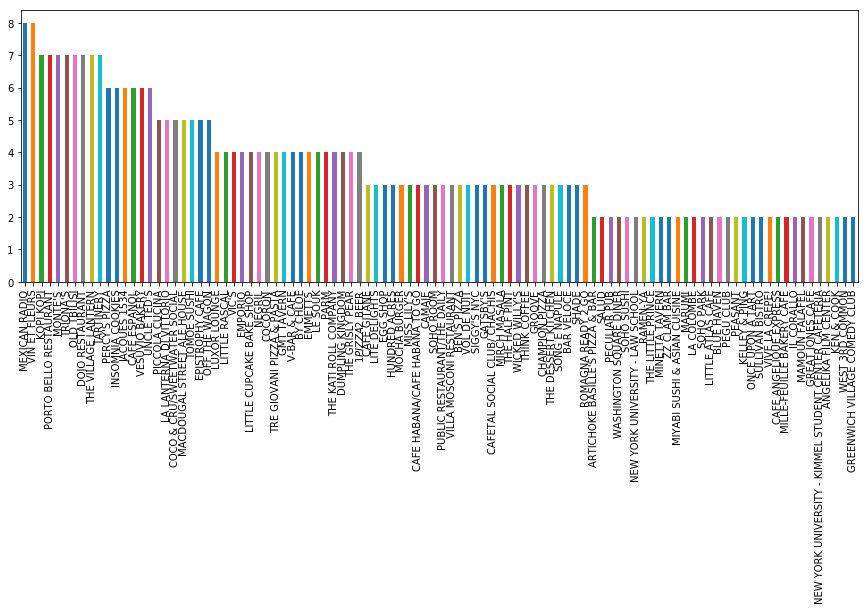

In [111]:
has_mice_10012["DBA"].value_counts()[:100].plot(kind='bar')

### Plotting

In [112]:
# We need to convert the "SCORE" column to a numeric data type (just in case the related part was not executed above)
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


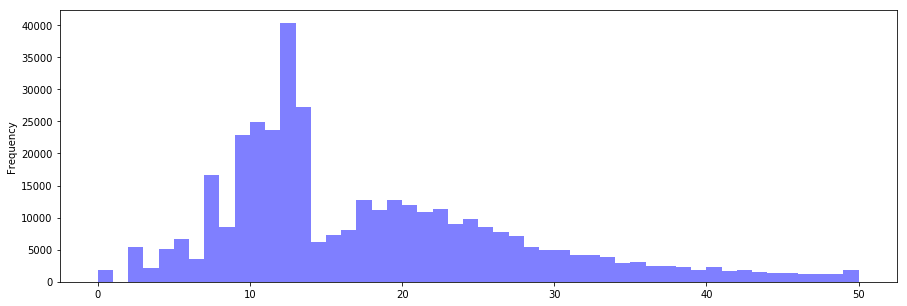

In [113]:
# We can plot a histogram of the scores using the plot(kind='hist') command
restaurants["SCORE"].plot(kind='hist', # histogram
                          bins=50, # use 50 bars
                          alpha=0.5, # add a bit of transparency
                          range=(0,50), # x-axis from 0 to 50
                          color='Blue', # use blue color
                          normed=False) # show raw count, normed = False

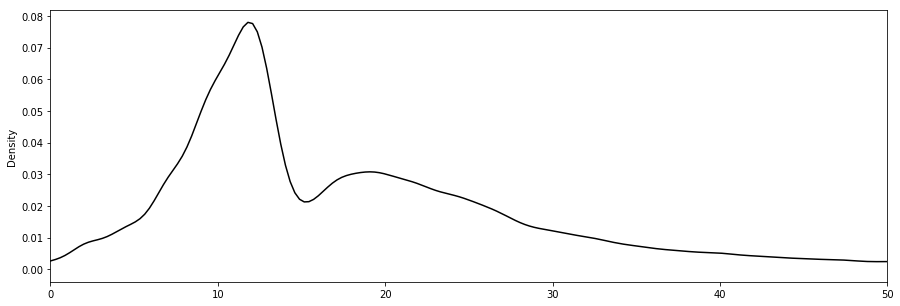

In [116]:
# This plots the density of a numeric attribute
# kde = kernel density estimation
restaurants["SCORE"].plot(kind='kde', color='Black', xlim=(0,50))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


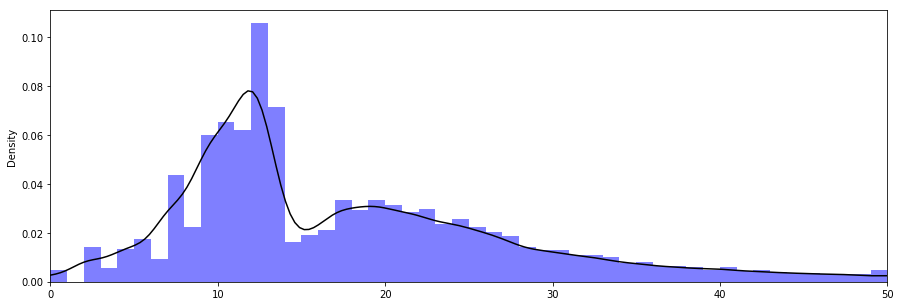

In [117]:
# This plots the density of a numeric attribute
# kde = kernel density estimation
# We can plot a histogram of the scores using the plot(kind='hist') command
restaurants["SCORE"].plot(kind='hist', # histogram
                          bins=50, # use 50 bars
                          alpha=0.5, # add a bit of transparency
                          range=(0,50), # x-axis from 0 to 50
                          color='Blue', # use blue color
                          normed=True) # show raw count, normed = False
restaurants["SCORE"].plot(kind='kde', color='Black', xlim=(0,50))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


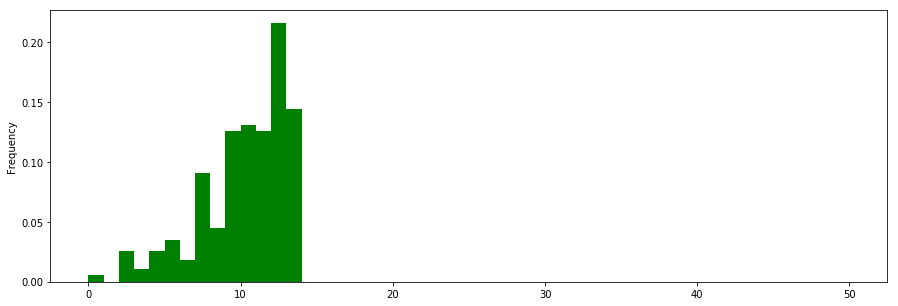

In [120]:
restaurants["SCORE"][ restaurants["GRADE"] == 'A' ].plot(kind = 'hist', 
                                                         bins=50, 
                                                         range=(0,50), 
                                                         color='Green', 
                                                         normed=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


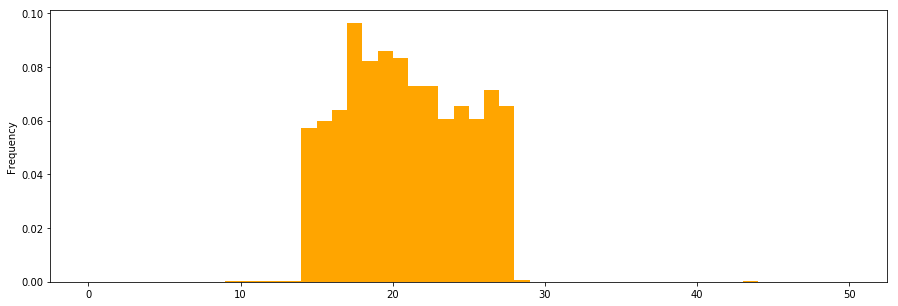

In [121]:
restaurants["SCORE"][ restaurants["GRADE"] == 'B' ].plot(kind = 'hist', 
                                                         bins=50, 
                                                         range=(0,50), 
                                                         color='Orange', 
                                                         normed=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


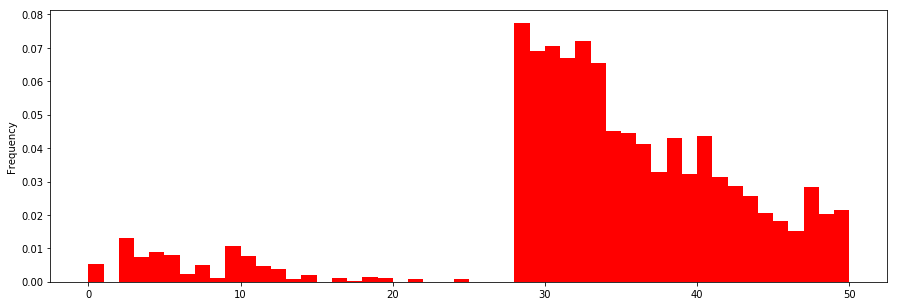

In [122]:
restaurants["SCORE"][ restaurants["GRADE"] == 'C' ].plot(kind = 'hist', 
                                                         bins=50, 
                                                         range=(0,50), 
                                                         color='Red', 
                                                         normed=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


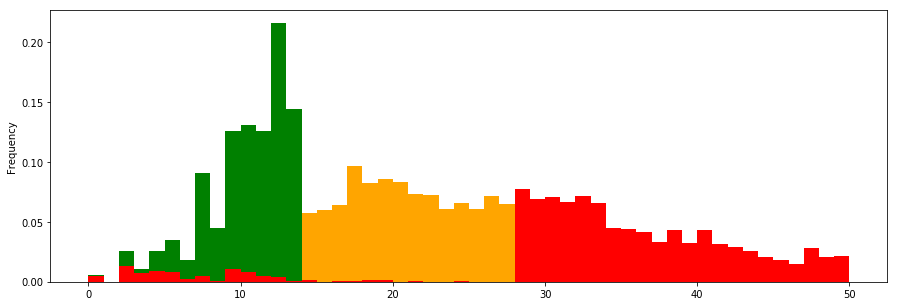

In [123]:
# We can also select specific rows to plot (e.g., in this case based on grade)
# Jupyter is smart enough to combine these three plots in one 
# (sometimes it is not smart, below we show how to make our desire to combine plots explicit)
restaurants["SCORE"][ restaurants["GRADE"] == 'A' ].plot(kind = 'hist', bins=50, range=(0,50), color='Green', normed=True)
restaurants["SCORE"][ restaurants["GRADE"] == 'B' ].plot(kind = 'hist', bins=50, range=(0,50), color='Orange', normed=True)
restaurants["SCORE"][ restaurants["GRADE"] == 'C' ].plot(kind = 'hist', bins=50, range=(0,50), color='Red', normed=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


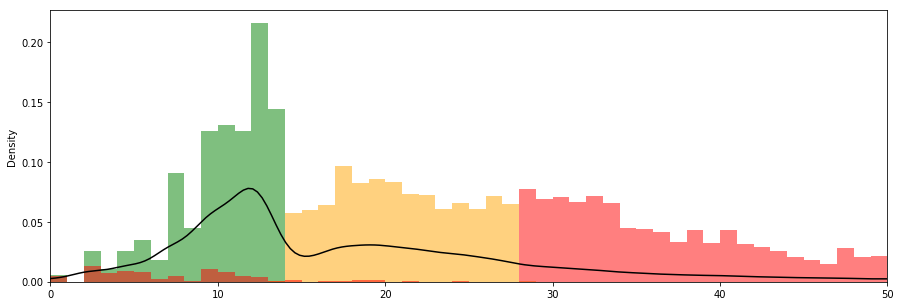

In [124]:
ax1 = restaurants["SCORE"][ restaurants["GRADE"] == 'A' ].plot(kind = 'hist',bins=50, alpha=0.5, range=(0,50), color='Green', normed=True)
ax2 = restaurants["SCORE"][ restaurants["GRADE"] == 'B' ].plot(kind = 'hist',bins=50, alpha=0.5, range=(0,50), color='Orange', normed=True, ax=ax1)
ax3 = restaurants["SCORE"][ restaurants["GRADE"] == 'C' ].plot(kind = 'hist',bins=50, alpha=0.5, range=(0,50), color='Red', normed=True, ax=ax2)
restaurants["SCORE"].plot(kind='kde', color='Black', xlim=(0,50), ax=ax3)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


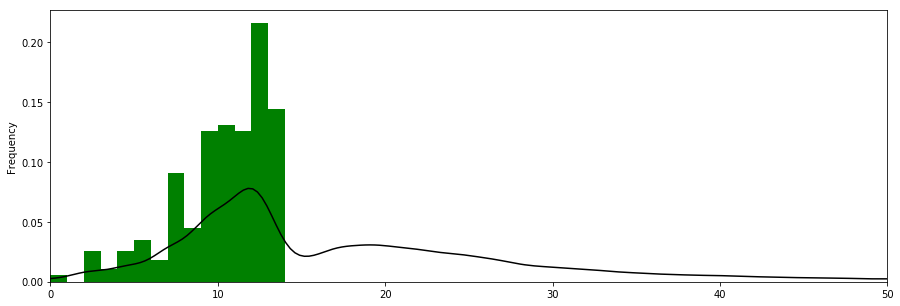

In [125]:
restaurants["SCORE"].plot(kind='kde', color='Black', xlim=(0,50))
restaurants["SCORE"][ restaurants["GRADE"] == 'A' ].plot(kind = 'hist',bins=50, range=(0,50), color='Green', normed=True)
restaurants["SCORE"][ restaurants["GRADE"] == 'B' ].plot(kind = 'hist',bins=50, range=(0,50), color='Orange', normed=True, ax=ax1)
restaurants["SCORE"][ restaurants["GRADE"] == 'C' ].plot(kind = 'hist',bins=50, range=(0,50), color='Red', normed=True, ax=ax2)


### Comparison with SQL

For a comparison with SQL, see http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

Pandas supports its own set of operators for doing SQL-like operations (in reality it runs a in-memory SQL database in the backend). It is also possible to use straightforward SQL queries to query Pandas dataframes, by using the `pandasql` package:

In [128]:
!sudo -H pip install -U pandasql

Requirement not upgraded as not directly required: numpy in /usr/local/lib/python3.6/dist-packages (from pandasql) (1.14.4)
Requirement not upgraded as not directly required: pandas in /usr/local/lib/python3.6/dist-packages (from pandasql) (0.23.0)
Requirement not upgraded as not directly required: sqlalchemy in /usr/local/lib/python3.6/dist-packages (from pandasql) (1.2.8)
Requirement not upgraded as not directly required: python-dateutil>=2.5.0 in /usr/local/lib/python3.6/dist-packages (from pandas->pandasql) (2.7.3)
Requirement not upgraded as not directly required: pytz>=2011k in /usr/local/lib/python3.6/dist-packages (from pandas->pandasql) (2018.4)
Requirement not upgraded as not directly required: six>=1.5 in /usr/lib/python3/dist-packages (from python-dateutil>=2.5.0->pandas->pandasql) (1.11.0)
  Running setup.py bdist_wheel for pandasql ... done
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasq

In [129]:
from pandasql import sqldf

In [130]:
# PandaSQL does not like column names with spaces. So we will rename (some of) them.
restaurants.rename(columns={"VIOLATION CODE": "VIOLATION"}, inplace = True)

In [165]:
rest = restaurants[["DBA", "BORO", "VIOLATION", "SCORE"]]
# only take first 5000 as an example, SEEMS TO BLOW UP AT AROUND 7500
nrest=rest.head(50000)

In [160]:
q  = """
SELECT BORO, VIOLATION, COUNT(*) AS CNT 
FROM
  nrest
GROUP BY BORO, VIOLATION
ORDER BY CNT DESC
LIMIT 20;
"""

df = sqldf(q, globals())

In [161]:
df

,BORO,VIOLATION,CNT
0,MANHATTAN,10F,2786
1,MANHATTAN,08A,1884
2,BROOKLYN,10F,1721
3,QUEENS,10F,1600
4,MANHATTAN,02G,1541
5,MANHATTAN,06D,1467
6,MANHATTAN,06C,1286
7,BROOKLYN,08A,1285
8,MANHATTAN,04L,1282
9,MANHATTAN,10B,1147


In [162]:
q  = """
SELECT SCORE, COUNT(*) AS CNT 
FROM
  nrest
GROUP BY SCORE
ORDER BY SCORE
"""

df = sqldf(q, globals())

In [163]:
df

,SCORE,CNT
0,NaN,3025
1,-1.0,17
2,0.0,224
3,2.0,671
4,3.0,273
5,4.0,584
6,5.0,759
7,6.0,421
8,7.0,1973
9,8.0,1046


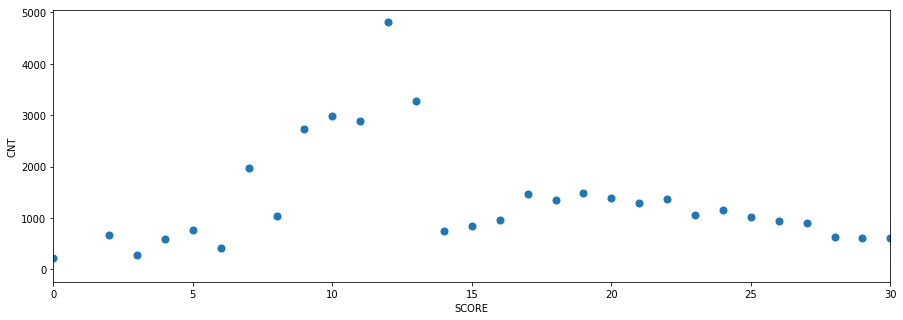

In [164]:
df.plot(kind='scatter', s=50, x="SCORE", y="CNT", xlim=(0,30))